#### **Análise exploratória de dados - Acidentes em BRs brasileiras**
*Autor: Vinícius Raony*  

---

# Analisando acidentes de trânsito no Brasil

Acidentes de trânsito são uma grande preocupação no Brasil e representam um problema de saúde pública, além de causar prejuízos econômicos e sociais. Dados públicos mostram que a maioria dos acidentes de trânsito ocorre em áreas urbanas, envolvendo veículos de passeio e motocicletas.

A análise dos dados de acidentes de trânsito no Brasil entre 2017 e 2022 pode fornecer insights valiosos sobre as causas, locais e fatores de risco desses incidentes, permitindo que as autoridades de trânsito tomem medidas preventivas e mitigatórias.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/ViniciusRaony/analisando-dados-acidentes-transito/main/images/acidente-carro1.jpg"></center>

No entanto, a disponibilidade e a qualidade dos dados de acidentes de trânsito no Brasil ainda são limitadas, o que pode dificultar a análise e a interpretação dos resultados.

Com o objetivo de contribuir para o debate sobre a segurança viária no país, esta análise explorará os dados disponíveis e buscará identificar tendências e padrões relevantes.

**Neste *notebook*, serão analisados os dados referentes à todos os Estados do Brasil, e ver quais insights podem ser extraídos a partir de dados brutos.**


## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site do Governo Federal Brasileiro de acordo com o Plano de Dados Abertos da PRF, que consta [neste meu link](https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos). 

Vale ressaltar que as informações sensíveis estão devidamente anonimizadas nos arquivos fornecidos.

Para esta análise exploratória inicial, seão baixados os arquivos *Agrupados por pessoa dos anos de* : 2017, 2018, 2019, 2020, 2021 e 2022.



## Análise Exploratória dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

Vamos importar os pacotes necessários e iniciar nossa Análise Exploratória.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o acidente
* `data_inversa` - data que ocorreu o acidente
* `dia_semana` - dia da semana que ocorreu o acidente
* `horario` - horário do acidente
* `uf` - Estado em que ocorreu o acidente
* `br` - rodovia Federal em que ocorreu o acidente
* `km` - kilometragem da BR onde onde ocorreu o acidente
* `municipio`municipio - município em que ocorreu o acidente
* `causa_acidente` - causa do acidente
* `tipo_acidente` - colisão frontal, traseira
* `classificacao_acidente` - se houve ou não vítimas fatais
* `fase_dia` - qual período do dia ocorreu o acidente
* `sentido_via` - sentido da via considerando o ponto de colisão: crescente e decrescente.
* `condicao_metereologica` - condição meteorológica na hora do acidente
* `tipo_pista` - pista possui mais de uma faixa para a trafegabilidade?
* `tracado_via` - acidente ocorreu numa reta ou curva?
* `uso_solo` - características do local do acidente:Urbano=Sim Rural=Não.
* `id_veiculo` - número de id gerado para identificar o automóvel envolvido no acidente
* `tipo_veiculo` - tipo de veículo envolvido no acidente
* `marca` - marca do veículo envolvido no acidente 
* `ano_fabricacao_veiculo` - ano de fabricação do veículo envolvido no acidente
* `tipo_envolvido` - sujeito envolvido no acidente: Condutor, Passageiro ou Testemunha
* `estado_fisico` - grau de ferimentos no acidente
* `idade` - idade do indivíduo envolvido no acidente
* `sexo` - sexo dos envolvidos no acidente
* `ilesos` - quantidade de pessoas que saíram ilesas do acidente
* `feridos_leves` - quantidade de pessoas que saíram ferimentos leves do acidente
* `feridos_graves` - quantidade de pessoas que saíram ferimentos graves do acidente
* `mortos` - quantidade de pessoas que viéram a óbito no acidente
* `latitude` - coordenada da latitude do acidente
* `longitude` - coordenada da longitude do acidente

In [ ]:
# importar os pacotes necessários
!pip install geopandas
import pandas as pd

# clonando repositório onde estão os dados brutos
!mkdir -p data/raw/por-pessoa
!curl https://raw.githubusercontent.com/ViniciusRaony/analisando-dados-acidentes-transito/main/raw/por-pessoa/acidentes2017_por_pessoa.csv -o data/raw/por-pessoa/acidentes2017_por_pessoa.csv
!curl https://raw.githubusercontent.com/ViniciusRaony/analisando-dados-acidentes-transito/main/raw/por-pessoa/acidentes2018_por_pessoa.csv -o data/raw/por-pessoa/acidentes2018_por_pessoa.csv
!curl https://raw.githubusercontent.com/ViniciusRaony/analisando-dados-acidentes-transito/main/raw/por-pessoa/acidentes2019_por_pessoa.csv -o data/raw/por-pessoa/acidentes2019_por_pessoa.csv
!curl https://raw.githubusercontent.com/ViniciusRaony/analisando-dados-acidentes-transito/main/raw/por-pessoa/acidentes2020_por_pessoa.csv -o data/raw/por-pessoa/acidentes2020_por_pessoa.csv
!curl https://raw.githubusercontent.com/ViniciusRaony/analisando-dados-acidentes-transito/main/raw/por-pessoa/acidentes2021_por_pessoa.csv -o data/raw/por-pessoa/acidentes2021_por_pessoa.csv
!curl https://raw.githubusercontent.com/ViniciusRaony/analisando-dados-acidentes-transito/main/raw/por-pessoa/acidentes2022_por_pessoa.csv -o data/raw/por-pessoa/acidentes2022_por_pessoa.csv

# definir o valor máximo de colunas como None para exibir todas as colunas
pd.set_option('display.max_columns', None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 36.2 MB/s eta 0:00:00
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 77.3M  100 77.3M    0     0  35.0M      0  0:00:02  0:00:02 --:--:-- 35.0M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65.8M  100 65.8M    0     0  42.2M      0  0:00:01  0:00:01 --:--:-- 42.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 67.2M  100 67.2M    0     

In [ ]:
# importar o arquivo acidentes{ano}_por_pessoa.csv para um DataFrame - anos referência 2017, 2018, 2019, 2020, 2021 e 2022
df2017 = pd.read_csv('/content/data/raw/por-pessoa/acidentes2017_por_pessoa.csv', encoding='ISO-8859-1', delimiter=";")

df2018 = pd.read_csv('/content/data/raw/por-pessoa/acidentes2018_por_pessoa.csv', encoding='ISO-8859-1', delimiter=";")

df2019 = pd.read_csv('/content/data/raw/por-pessoa/acidentes2019_por_pessoa.csv', encoding='ISO-8859-1', delimiter=";")

df2020 = pd.read_csv('/content/data/raw/por-pessoa/acidentes2020_por_pessoa.csv', encoding='ISO-8859-1', delimiter=";")

df2021 = pd.read_csv('/content/data/raw/por-pessoa/acidentes2021_por_pessoa.csv', encoding='ISO-8859-1', delimiter=";")

df2022 = pd.read_csv('/content/data/raw/por-pessoa/acidentes2022_por_pessoa.csv', encoding='ISO-8859-1', delimiter=";")

In [ ]:
df_valid = df2019.loc[(df2019['longitude'] >= -74.047185) & (df2019['longitude'] <= -34.791283) & (df2019['latitude'] >= -33.751921) & (df2019['latitude'] <= 5.272366)]


In [ ]:
# transformando a coluna data em datetime
df2019.data_inversa = pd.to_datetime(df2019.data_inversa)

# substitui vírgulas por pontos na coluna 'longitude'
df2019['longitude'] = df2019['longitude'].str.replace(',', '.')

# substitui vírgulas por pontos na coluna 'latitude'
df2019['latitude'] = df2019['latitude'].str.replace(',', '.')

# converte colunas 'longitude' e 'latitude' para float
df2019['longitude'] = df2019['longitude'].astype(float)
df2019['latitude'] = df2019['latitude'].astype(float)



In [ ]:
# juntar todos os datasets em apenas um DataFrame para facilitar a análise
df_acidentes_2017_2022 = pd.concat([df2017, df2018, df2019, df2020, df2021, df2022], ignore_index=True)

In [ ]:
# Quantidade total de acidentes
df_acidentes_2017_2022.groupby('id').size()


id
8.0         1
9.0         1
11.0        2
12.0        1
13.0        1
           ..
501713.0    6
501790.0    2
501893.0    1
501895.0    3
501999.0    3
Length: 419017, dtype: int64

Parte importante da nossa análise, é descobrir o tamanho do dataset que estamos encarando.

 Vamos verificar:

In [ ]:
# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis: ',df_acidentes_2017_2022.shape[1], "\n"
      'Entradas: ', df_acidentes_2017_2022.shape[0])

# verificando as primeiras entradas
df_acidentes_2017_2022.head(100)

Dimensões do Dataset 
Variáveis:  38 
Entradas:  985506


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop,homem_condutor,mulher_condutor,feriado
0,17.0,15.0,2017-01-01,domingo,01:45:00,RS,116.0,"34,9",VACARIA,Defeito Mecânico no Veículo,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Reta,Não,17.0,Caminhão,VW/17.280 CRM 4X2 4P/17.280 CRM 4X2 4P/17.280 ...,2014.0,Condutor,Ileso,31.0,Masculino,1,0,0,0,-28.507120,-50.941176,SPRF-RS,DEL05-RS,UOP03-DEL05-RS,1,0,Ano novo
1,20.0,1541.0,2017-01-01,domingo,01:00:00,PR,376.0,636,TIJUCAS DO SUL,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Fatais,Plena Noite,Crescente,Garoa/Chuvisco,Dupla,Curva,Não,1296.0,Caminhão,M.BENZ/ATEGO 2430/ATEGO 2430/ATEGO 2430/ATEGO ...,2014.0,Condutor,Ileso,28.0,Masculino,1,0,0,0,-25.754000,-49.126600,SPRF-PR,DEL01-PR,DEL7/1-UOP08/PR,1,0,Ano novo
2,69.0,11707.0,2017-01-01,domingo,04:40:00,BA,101.0,65,ENTRE RIOS,Condutor Dormindo,Colisão frontal,Com Vítimas Fatais,Amanhecer,Decrescente,Nublado,Simples,Curva,Não,1659.0,Caminhão-trator,SCANIA/G 380 A4X2/G 380 A4X2/G 380 A4X2/G 380 ...,2009.0,Condutor,Ileso,53.0,Masculino,1,0,0,0,-11.961800,-38.095300,SPRF-BA,DEL01-BA,UOP04-DEL01-BA,1,0,Ano novo
3,106.0,314.0,2017-01-01,domingo,06:30:00,PA,316.0,"72,5",CASTANHAL,Falta de Atenção à Condução,Colisão lateral,Com Vítimas Fatais,Amanhecer,Decrescente,Céu Claro,Simples,Reta,Não,263.0,Caminhão,I/MERCEDES/MERCEDES/MERCEDES/MERCEDES,1990.0,Condutor,Ileso,NaN,Masculino,1,0,0,0,-1.289980,-47.834832,SPRF-PA,DEL01-PA,DEL19/1-UOP02/PA,1,0,Ano novo
4,106.0,318.0,2017-01-01,domingo,06:30:00,PA,316.0,"72,5",CASTANHAL,Falta de Atenção à Condução,Colisão lateral,Com Vítimas Fatais,Amanhecer,Decrescente,Céu Claro,Simples,Reta,Não,263.0,Caminhão,I/MERCEDES/MERCEDES/MERCEDES/MERCEDES,1990.0,Passageiro,Ileso,NaN,Feminino,1,0,0,0,-1.289980,-47.834832,SPRF-PA,DEL01-PA,DEL19/1-UOP02/PA,0,0,Ano novo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,589.0,1004.0,2017-01-02,segunda-feira,19:10:00,MS,163.0,"457,1",CAMPO GRANDE,Não guardar distância de segurança,Colisão traseira,Sem Vítimas,Plena Noite,Crescente,Chuva,Simples,Reta,Não,830.0,Caminhão-trator,SCANIA/R142 E/R142 E/R142 E/R142 E,1983.0,Condutor,Ileso,35.0,Masculino,1,0,0,0,-20.469711,-54.620121,SPRF-MS,DEL01-MS,UOP01-DEL01-MS,1,0,Não
96,589.0,1006.0,2017-01-02,segunda-feira,19:10:00,MS,163.0,"457,1",CAMPO GRANDE,Não guardar distância de segurança,Colisão traseira,Sem Vítimas,Plena Noite,Crescente,Chuva,Simples,Reta,Não,847.0,Caminhão,FORD/CARGO 2428 CNL/CARGO 2428 CNL/CARGO 2428 ...,2011.0,Condutor,Ileso,69.0,Masculino,1,0,0,0,-20.469711,-54.620121,SPRF-MS,DEL01-MS,UOP01-DEL01-MS,1,0,Não
97,596.0,1010.0,2017-01-02,segunda-feira,20:30:00,SP,116.0,"139,4",SAO JOSE DOS CAMPOS,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Crescente,Chuva,Dupla,Reta,Sim,857.0,Caminhão,NaN,NaN,Pedestre,Óbito,NaN,Masculino,0,0,0,1,-23.161331,-45.803430,SPRF-SP,DEL06-SP,UOP02-DEL02-SP,0,0,Não
98,596.0,1020.0,2017-01-02,segunda-feira,20:30:00,SP,116.0,"139,4",SAO JOSE DOS CAMPOS,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Crescente,Chuva,Dupla,Reta,Sim,857.0,Caminhão,NaN,NaN,Condutor,Ileso,NaN,Ignorado,1,0,0,0,-23.161331,-45.803430,SPRF-SP,DEL06-SP,UOP02-DEL02-SP,0,0,Não


Analisando os tipos de variáveis do Dataset.

In [ ]:
df2019.dtypes

id                               float64
pesid                            float64
data_inversa              datetime64[ns]
dia_semana                        object
horario                           object
uf                                object
br                               float64
km                                object
municipio                         object
causa_acidente                    object
tipo_acidente                     object
classificacao_acidente            object
fase_dia                          object
sentido_via                       object
condicao_metereologica            object
tipo_pista                        object
tracado_via                       object
uso_solo                          object
id_veiculo                         int64
tipo_veiculo                      object
marca                             object
ano_fabricacao_veiculo           float64
tipo_envolvido                    object
estado_fisico                     object
idade           

In [ ]:
# verificando o tipo das variáveis
df_acidentes_2017_2022.dtypes

id                               float64
pesid                            float64
data_inversa              datetime64[ns]
dia_semana                        object
horario                           object
uf                                object
br                                object
km                                object
municipio                         object
causa_acidente                    object
tipo_acidente                     object
classificacao_acidente            object
fase_dia                          object
sentido_via                       object
condicao_metereologica            object
tipo_pista                        object
tracado_via                       object
uso_solo                          object
id_veiculo                       float64
tipo_veiculo                      object
marca                             object
ano_fabricacao_veiculo           float64
tipo_envolvido                    object
estado_fisico                     object
idade           

Como vimos ao analisar o tipo das variáveis, verificamos que a coluna `data_inversa` não está em formato **datetime**, bem como as colunas `longitude` e `latitude` não são **float**. Para conseguirmos trabalhar com essas colunas iremos realizar as devidas transformações.

In [ ]:
# transformando a coluna data em datetime
df_acidentes_2017_2022.data_inversa = pd.to_datetime(df_acidentes_2017_2022.data_inversa)

# substitui vírgulas por pontos na coluna 'longitude'
df_acidentes_2017_2022['longitude'] = df_acidentes_2017_2022['longitude'].str.replace(',', '.')

# substitui vírgulas por pontos na coluna 'latitude'
df_acidentes_2017_2022['latitude'] = df_acidentes_2017_2022['latitude'].str.replace(',', '.')

# converte colunas 'longitude' e 'latitude' para float
df_acidentes_2017_2022['longitude'] = df_acidentes_2017_2022['longitude'].astype(float)
df_acidentes_2017_2022['latitude'] = df_acidentes_2017_2022['latitude'].astype(float)
df_acidentes_2017_2022['br'] = df_acidentes_2017_2022['br'].astype(str)


In [ ]:
# Criar colunas para contar o número de homens e mulheres condutores
df_acidentes_2017_2022['homem_condutor'] = 0
df_acidentes_2017_2022['mulher_condutor'] = 0

# Iterar sobre as linhas do DataFrame
for i, row in df_acidentes_2017_2022.iterrows():
    # Verificar se o valor de 'tipo_envolvido' é 'Condutor'
    if row['tipo_envolvido'] == 'Condutor':
        # Verificar o valor de 'sexo' e atualizar a coluna correspondente
        if row['sexo'] == 'Masculino':
            df_acidentes_2017_2022.at[i, 'homem_condutor'] += 1
        elif row['sexo'] == 'Feminino':
            df_acidentes_2017_2022.at[i, 'mulher_condutor'] += 1


In [ ]:
# verificando as colunas existentes no dataset
df_acidentes_2017_2022.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'id_veiculo', 'tipo_veiculo', 'marca', 'ano_fabricacao_veiculo',
       'tipo_envolvido', 'estado_fisico', 'idade', 'sexo', 'ilesos',
       'feridos_leves', 'feridos_graves', 'mortos', 'latitude', 'longitude',
       'regional', 'delegacia', 'uop'],
      dtype='object')

Verificando a **ausência** de dados

In [ ]:
# verificando dados ausentes
round((df_acidentes_2017_2022.isnull().sum() / df_acidentes_2017_2022.shape[0]).sort_values(ascending=False),2)

Criando grão ocorrência e grão veículo. Teremos 3 grãos para escolher para analisar: 
- Grão pessoa; 
- Grão ocorrência; 
- Grão veículo.

In [ ]:
df_acidentes_2017_2022_grao_veiculo = df_acidentes_2017_2022.groupby('id_veiculo').agg({
    'id': 'first', 
    'data_inversa': 'first',
    'dia_semana': 'first',
    'horario': 'first',
    'id_veiculo': 'first', 
    'tipo_veiculo': 'first', 
    'marca': 'first', 
    'ano_fabricacao_veiculo': 'first',
    'tipo_envolvido': 'first'
})

# salvar o DataFrame em um arquivo CSV (descomentar linha abaixo caso queira usar o csv processado)
df_acidentes_2017_2022_grao_veiculo.to_csv('/content/df_acidentes_2017_2022_grao_veiculo.csv', index=True)

In [ ]:
# salvar o DataFrame em um arquivo CSV (descomentar linha abaixo caso queira usar o csv processado)
df_valid.to_csv('/content/df_acidentes_df_valid.csv', index=True)

In [ ]:
df_acidentes_2017_2022_grao_ocorrencia = df_acidentes_2017_2022.groupby('id').agg({    
    'data_inversa': 'first',
    'dia_semana': 'first',
    'horario': 'first',
    'uf': 'first', 
    'br': 'first',
    'km': 'first', 
    'municipio': 'first', 
    'causa_acidente': 'first', 
    'tipo_acidente': 'first',
    'classificacao_acidente': 'first',
    'fase_dia': 'first',    
    'condicao_metereologica': 'first', 
    'tipo_pista': 'first', 
    'tracado_via': 'first', 
    'tipo_envolvido': 'first', 
    'estado_fisico': 'first',  
    'ilesos': 'sum',
    'feridos_leves': 'sum', 
    'feridos_graves': 'sum', 
    'mortos': 'sum', 
    'latitude': 'first', 
    'longitude': 'first',
    'homem_condutor': 'sum',
    'mulher_condutor': 'sum',
    'feriado': 'first'  
})

# salvar o DataFrame em um arquivo CSV (descomentar linha abaixo caso queira usar o csv processado)
df_acidentes_2017_2022_grao_ocorrencia.to_csv('/content/df_acidentes_2017_2022_grao_ocorrencia.csv', index=True)

In [ ]:
# salvar o DataFrame em um arquivo CSV (descomentar linha abaixo caso queira usar o csv processado)
df_acidentes_2017_2022_grao_ocorrencia.to_csv('/content/df_acidentes_2017_2022_grao_ocorrencia.csv', index=True)

In [ ]:
# Verificar os valores únicos na coluna 'causa_acidente'
causas_acidentes_unicas = df_acidentes_2017_2022['horario'].unique()

# Imprimir a lista de causas de acidentes únicas
print(causas_acidentes_unicas)


['01:45:00' '01:00:00' '04:40:00' ... '03:56:00' '04:36:00' '03:13:00']


Dimensões do Dataset 
Variáveis:  9 
Entradas:  985506
   id tipo_envolvido  id_veiculo                                                                 marca          sexo  feridos_leves  feridos_graves  mortos estado_fisico
334.0       Condutor       426.0 IVECO/STRALIS 570S41T/STRALIS 570S41T/STRALIS 570S41T/STRALIS 570S41T     Masculino              0               0       1         Óbito
334.0     Testemunha       426.0 IVECO/STRALIS 570S41T/STRALIS 570S41T/STRALIS 570S41T/STRALIS 570S41T Não Informado              0               0       0 Não Informado


In [ ]:
# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis: ',df_acidentes_2017_2022_grao_ocorrencia.shape[1], "\n"
      'Entradas: ', df_acidentes_2017_2022_grao_ocorrencia.shape[0])

# verificando as primeiras entradas com tipo_envolvido = Passageiro
print(df_acidentes_2017_2022_grao_ocorrencia.head().to_string(index=False))

Dimensões do Dataset 
Variáveis:  32 
Entradas:  419017
  id data_inversa dia_semana  horario uf    br   km                municipio                          causa_acidente                tipo_acidente classificacao_acidente    fase_dia condicao_metereologica tipo_pista   tracado_via  id_veiculo tipo_veiculo                                                                     marca  ano_fabricacao_veiculo tipo_envolvido estado_fisico  idade      sexo  ilesos  feridos_leves  feridos_graves  mortos  latitude  longitude  homem_condutor  mulher_condutor feriado
 8.0   2017-01-01    domingo 00:00:00 PR 376.0  112                PARANAVAI                   Fenômenos da Natureza Queda de ocupante de veículo    Com Vítimas Feridas Plena Noite                  Chuva    Simples          Reta         5.0  Motocicleta HONDA/CG 150 TITAN ESD/CG 150 TITAN ESD/CG 150 TITAN ESD/CG 150 TITAN ESD                  2005.0       Condutor Lesões Graves   19.0 Masculino       0              0               1 

In [ ]:
# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis: ',df_acidentes_2017_2022_grao_veiculo.shape[1], "\n"
      'Entradas: ', df_acidentes_2017_2022_grao_veiculo.shape[0])

# verificando as primeiras entradas com tipo_envolvido = Passageiro
print(df_acidentes_2017_2022_grao_veiculo.head(50).to_string(index=False))

Dimensões do Dataset 
Variáveis:  9 
Entradas:  688514
  id data_inversa dia_semana  horario  id_veiculo tipo_veiculo                                                                                marca  ano_fabricacao_veiculo tipo_envolvido
13.0   2017-01-01    domingo 00:00:00         4.0    Automóvel                                   GM/CORSA SEDAN/CORSA SEDAN/CORSA SEDAN/CORSA SEDAN                  2004.0       Condutor
 8.0   2017-01-01    domingo 00:00:00         5.0  Motocicleta            HONDA/CG 150 TITAN ESD/CG 150 TITAN ESD/CG 150 TITAN ESD/CG 150 TITAN ESD                  2005.0       Condutor
11.0   2017-01-01    domingo 00:00:00         6.0    Automóvel                               VW/NOVO GOL 1.0/NOVO GOL 1.0/NOVO GOL 1.0/NOVO GOL 1.0                  2013.0       Condutor
 9.0   2017-01-01    domingo 00:01:00         7.0    Automóvel             FIAT/PALIO WEEKEND EX/PALIO WEEKEND EX/PALIO WEEKEND EX/PALIO WEEKEND EX                  2003.0       Condutor
12.0   201

Após alterar o formato, vamos verificar qual a data mais recente do nosso dataset. Com essa informação, vamos verificar o país líder em casos naquele momento.

In [ ]:
# verificando a data mais recente do dataset
df_acidentes_2017_2022.data_inversa.max()

Timestamp('2022-12-31 00:00:00')

### Enriquecendo os dados

In [ ]:
# Acrescentando os dias de feriados para saber se existem mais mortes nessas datas
import holidays

br_holidays = holidays.Brazil()

def is_holiday(date):
    if date in br_holidays:
        return br_holidays.get(date)
    else:
        return 'Não'

df_acidentes_2017_2022['feriado'] = df_acidentes_2017_2022['data_inversa'].apply(is_holiday)


In [ ]:
# Criando coluna homem_condutor e mulher_conduto, o objetivo é verificar se quem se envolve mais em acidentes é o homem ou a mulher
df_acidentes_2017_2022['homem_condutor'] = df_acidentes_2017_2022.loc[df_acidentes_2017_2022['tipo_envolvido'] == 'Condutor'].groupby('tipo_envolvido')['sexo'].apply(lambda x: (x == 'Masculino').sum())
df_acidentes_2017_2022['mulher_condutor'] = df_acidentes_2017_2022.loc[df_acidentes_2017_2022['tipo_envolvido'] == 'Condutor'].groupby('tipo_envolvido')['sexo'].apply(lambda x: (x == 'Feminino').sum())


In [ ]:
# Criar uma coluna 'feriado' para indicar se a data é um feriado
df_acidentes_2017_2022['feriado'] = df_acidentes_2017_2022['data_inversa'].apply(lambda x: is_holiday(x))

# Lista de funções de agregação que serão aplicadas a cada grupo
agg_functions = {
    'feriado': lambda x: x.iloc[0]
}

# Agregar os dados por id usando as funções de agregação especificadas
df_grouped = df_acidentes_2017_2022[['id', 'feriado']].groupby('id').agg(agg_functions)


NameError: ignored

In [ ]:
# Analisamos e chegamos a conclusão que precisamos enriquecer o dataset, agrupar os casos por id e criar novas colunas, como Masculino e Feminino para termos o recorte por sexo
df_acidentes_2017_2022['Masculino'] = 0
df_acidentes_2017_2022['Feminino'] = 0

# Grupando por id da ocorrência, e dando apply em cada linha de 1 grupo para somar a quantidade de acidentados do sexo masculino e feminino nas novas colunas criadas

df_grouped = df_acidentes_2017_2022('id').apply(lambda x: pd.Series({
    
    'id': x['id'],
    'data_inversa': x['data_inversa'],
    'dia_semana': x['dia_semana'],
    'horario': x['horario'],
    'uf': x['uf'],
    'br': x['br'],
    'km': x['km'],
    'municipio': x['municipio'],
    'causa_acidente': x['causa_acidente'],
    'tipo_acidente': x['tipo_acidente']
    'classificacao_acidente'
    'fase_dia'
    'sentido_via'
    'condicao_metereologica'
    'tipo_pista'
    'tracado_via'
    'id_veiculo'
    'tipo_veiculo'
    'marca'
    'ano_fabricacao_veiculo'
    'tipo_envolvido'
    'estado_fisico'
    'idade'
    'sexo'
    'ilesos'
    'feridos_leves'
    'feridos_graves'
    'mortos'
    'latitude'
    'longitude'
    'regional'
    'delegacia'
    'uop'
    'Masculino': (x['sexo'] == 'Masculino').sum(),
    'Feminino': (x['sexo'] == 'Feminino').sum(),
   
}))

### **Q1.Qual tipo de veículo se envolve com mais frequência em algum tipo de acidente**




In [ ]:
# Agrupar os dados por id_veiculo e contar o número de ocorrências de cada tipo_veiculo
veiculos_por_id = df_acidentes_2017_2022.groupby('id_veiculo')['tipo_veiculo'].value_counts()

# Agrupar os dados por tipo_veiculo e contar o número de ocorrências
contagem_por_tipo = veiculos_por_id.groupby('tipo_veiculo').count().sort_values(ascending=False)

# Exibir os resultados
print(contagem_por_tipo)


Pudemos verificar que no período entre 01/01/2017 e 31/12/2022 tivemos os seguintes tipos de veículos envolvidos em acidentes:

* Automóvel - 281.114 acidentes
* Motocicleta - 142.024 acidentes
* Caminhão-trator - 72.320 acidentes

Os dados mostram como é letal as vias Federais para automóveis de passeio, um dado curioso é que houveram 11.695 acidentes envolvendo Bicicletas.

### **Q2. Quantidade de mortos nas rodovias Federais nos anos de 2017 à 2022**

In [ ]:
import geopandas as gpd

# lê o arquivo shapefile dos estados do Brasil
Brazil_states = gpd.read_file('/content/drive/MyDrive/SH Brazil/BR_UF_2021.shp')

# cria um GeoDataFrame dos acidentes com base nas coordenadas iniciais
geo_Brazil_accidents = gpd.GeoDataFrame(df_acidentes_2017_2022, geometry=gpd.points_from_xy(df_acidentes_2017_2022.longitude, df_acidentes_2017_2022.latitude))

# define o CRS para o sistema de referência correto para o Brasil
geo_Brazil_accidents.crs = 'epsg:4674'

# exibe as primeiras linhas do GeoDataFrame
geo_Brazil_accidents


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop,geometry
0,17.0,15.0,2017-01-01,domingo,01:45:00,RS,116.0,"34,9",VACARIA,Defeito Mecânico no Veículo,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Reta,Não,17.0,Caminhão,VW/17.280 CRM 4X2 4P/17.280 CRM 4X2 4P/17.280 ...,2014.0,Condutor,Ileso,31.0,Masculino,1,0,0,0,-28.507120,-50.941176,SPRF-RS,DEL05-RS,UOP03-DEL05-RS,POINT (-50.94118 -28.50712)
1,20.0,1541.0,2017-01-01,domingo,01:00:00,PR,376.0,636,TIJUCAS DO SUL,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Fatais,Plena Noite,Crescente,Garoa/Chuvisco,Dupla,Curva,Não,1296.0,Caminhão,M.BENZ/ATEGO 2430/ATEGO 2430/ATEGO 2430/ATEGO ...,2014.0,Condutor,Ileso,28.0,Masculino,1,0,0,0,-25.754000,-49.126600,SPRF-PR,DEL01-PR,DEL7/1-UOP08/PR,POINT (-49.12660 -25.75400)
2,69.0,11707.0,2017-01-01,domingo,04:40:00,BA,101.0,65,ENTRE RIOS,Condutor Dormindo,Colisão frontal,Com Vítimas Fatais,Amanhecer,Decrescente,Nublado,Simples,Curva,Não,1659.0,Caminhão-trator,SCANIA/G 380 A4X2/G 380 A4X2/G 380 A4X2/G 380 ...,2009.0,Condutor,Ileso,53.0,Masculino,1,0,0,0,-11.961800,-38.095300,SPRF-BA,DEL01-BA,UOP04-DEL01-BA,POINT (-38.09530 -11.96180)
3,106.0,314.0,2017-01-01,domingo,06:30:00,PA,316.0,"72,5",CASTANHAL,Falta de Atenção à Condução,Colisão lateral,Com Vítimas Fatais,Amanhecer,Decrescente,Céu Claro,Simples,Reta,Não,263.0,Caminhão,I/MERCEDES/MERCEDES/MERCEDES/MERCEDES,1990.0,Condutor,Ileso,NaN,Masculino,1,0,0,0,-1.289980,-47.834832,SPRF-PA,DEL01-PA,DEL19/1-UOP02/PA,POINT (-47.83483 -1.28998)
4,106.0,318.0,2017-01-01,domingo,06:30:00,PA,316.0,"72,5",CASTANHAL,Falta de Atenção à Condução,Colisão lateral,Com Vítimas Fatais,Amanhecer,Decrescente,Céu Claro,Simples,Reta,Não,263.0,Caminhão,I/MERCEDES/MERCEDES/MERCEDES/MERCEDES,1990.0,Passageiro,Ileso,NaN,Feminino,1,0,0,0,-1.289980,-47.834832,SPRF-PA,DEL01-PA,DEL19/1-UOP02/PA,POINT (-47.83483 -1.28998)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985501,501893.0,1096291.0,2022-11-19,sábado,20:20:00,AL,316.0,"148,5",PALMEIRA DOS INDIOS,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Reta,Não,883332.0,Motocicleta,HONDA/POP100,2014.0,Condutor,Lesões Graves,36.0,Masculino,0,0,1,0,-9.407182,-36.688297,SPRF-AL,DEL03-AL,UOP01-DEL03-AL,POINT (-36.68830 -9.40718)
985502,501895.0,1096301.0,2022-11-20,domingo,23:15:00,PR,376.0,638,TIJUCAS DO SUL,Ausência de reação do condutor,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Dupla,Reta,Não,883338.0,Motocicleta,JTA/SUZUKI INTRUDER 125,2007.0,Condutor,Lesões Leves,36.0,Feminino,0,1,0,0,-25.765038,-49.124498,SPRF-PR,DEL01-PR,UOP04-DEL01-PR,POINT (-49.12450 -25.76504)
985503,501895.0,1096300.0,2022-11-20,domingo,23:15:00,PR,376.0,638,TIJUCAS DO SUL,Ausência de reação do condutor,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Dupla,Reta,Não,883338.0,Motocicleta,JTA/SUZUKI INTRUDER 125,2007.0,Passageiro,Lesões Graves,35.0,Feminino,0,0,1,0,-25.765038,-49.124498,SPRF-PR,DEL01-PR,UOP04-DEL01-PR,POINT (-49.12450 -25.76504)
985504,501999.0,1096530.0,2022-11-08,terça-feira,09:20:00,RO,364.0,14,VILHENA,Manobra de mudança de faixa,Colisão lateral mesmo sentido,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Interseção de vias,Sim,883509.0,Motocicleta,HONDA/CB 300R,2013.0,Passageiro,Lesões Graves,40.0,Feminino,0,0,1,0,-12.738925,-60.139536,SPRF-RO,DEL04-RO,UOP01-DEL04-RO,POINT (-60.13954 -12.73892)


In [ ]:
import geopandas as gpd

# Agrupa o df_acidentes_2017_2022 por id
df_acidentes_grouped = df_acidentes_2017_2022.groupby('id').agg({'latitude': 'first', 'longitude': 'first'})

# Filtra apenas os valores de latitude e longitude que estão dentro do range válido
valid_range_lat = (-90, 90)
valid_range_lon = (-180, 180)
df_acidentes_filtered = df_acidentes_grouped[(df_acidentes_grouped['latitude'] >= valid_range_lat[0]) &
                                             (df_acidentes_grouped['latitude'] <= valid_range_lat[1]) &
                                             (df_acidentes_grouped['longitude'] >= valid_range_lon[0]) &
                                             (df_acidentes_grouped['longitude'] <= valid_range_lon[1])]

# Cria um GeoDataFrame dos acidentes com base nas coordenadas iniciais
geo_Brazil_accidents = gpd.GeoDataFrame(df_acidentes_filtered, geometry=gpd.points_from_xy(df_acidentes_filtered.longitude, df_acidentes_filtered.latitude))

# Define o CRS para o sistema de referência correto para o Brasil
geo_Brazil_accidents.crs = 'epsg:4674'

# Exibe as primeiras linhas do GeoDataFrame
geo_Brazil_accidents.head()


In [ ]:
geo_Brazil_accidents.crs

In [ ]:
geo_Brazil_accidents.sort_values(by='longitude', inplace=True)
print(geo_Brazil_accidents[['longitude']].head())



In [ ]:
# filtrar coordenadas fora do range válido
out_of_range = geo_Brazil_accidents.query('latitude < -90 or latitude > 90 or longitude < -180 or longitude > 180')

# imprimir o resultado
print(out_of_range)


In [ ]:
print(geo_Brazil_accidents.loc[(geo_Brazil_accidents['longitude'] < -180) & (geo_Brazil_accidents['latitude'] < -90)])

In [ ]:
geo_Brazil_accidents.sample(50000).plot(figsize=(12,12))

In [ ]:
# mostra a maior e a menor latitude no dataframe
print("Maior latitude:", df_acidentes_2017_2022['latitude'].max())
print("Menor latitude:", df_acidentes_2017_2022['latitude'].min())


# mostra a maior e a menor latitude no dataframe
print("Maior longitude:", df_acidentes_2017_2022['longitude'].max())
print("Menor longitude:", df_acidentes_2017_2022['longitude'].min())


In [ ]:
import pandas as pd



# verificando as primeiras entradas com valores inválidos
df_invalidos = df_acidentes_2017_2022[(df_acidentes_2017_2022.latitude < -90) | (df_acidentes_2017_2022.latitude > 90) | (df_acidentes_2017_2022.longitude < -180) | (df_acidentes_2017_2022.longitude > 180)]

print(df_invalidos.head(500))


**Análise 1. Classificação de ocorrências de 2017 à 2022**






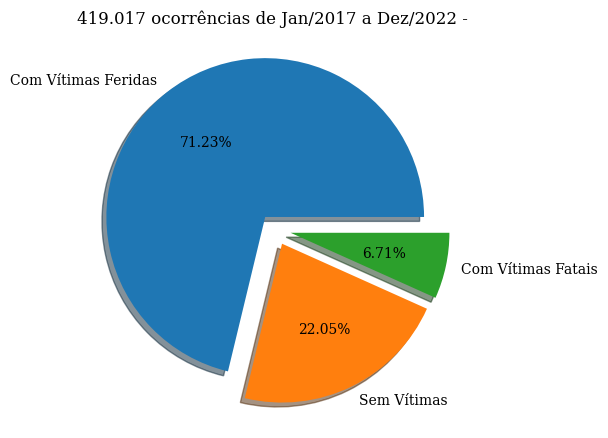

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'serif'

# extrair as ocorrências para um dicionário
ocorrencia_classificacao = dict(df_acidentes_2017_2022_grao_ocorrencia['classificacao_acidente'].value_counts())

# preparar dados para o pie chart
labels = [f"{k} ({v})" for k, v in ocorrencia_classificacao.items()]
sizes = np.array(list(ocorrencia_classificacao.values())).astype(float)

# calcular o tamanho do explode de acordo com o tamanho de sizes
explode = [0.1] * len(sizes)

# plotar o gráfico de pizza
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True)
ax.set_title("419.017 ocorrências de Jan/2017 a Dez/2022 - ")

plt.tight_layout()


**Análise 2. Evolução de acidentes de Jan/2017 a Dez/2022**


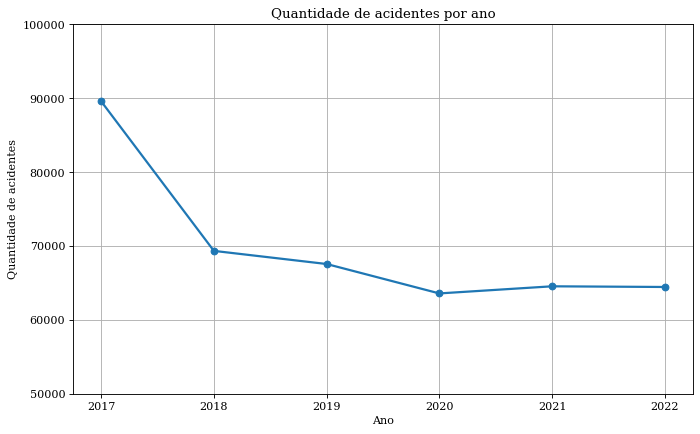

In [ ]:
import matplotlib.pyplot as plt

# Crie uma nova coluna com o ano de cada data
df_acidentes_2017_2022_grao_ocorrencia['ano'] = pd.DatetimeIndex(df_acidentes_2017_2022_grao_ocorrencia['data_inversa']).year

# Agrupe os dados por ano e conte o número de acidentes em cada grupo
acidentes_por_ano = df_acidentes_2017_2022_grao_ocorrencia.groupby('ano')['id'].count()

# Crie um gráfico de linha com os resultados
fig, ax = plt.subplots(figsize=(10,6), dpi=80)
ax.plot(acidentes_por_ano.index, acidentes_por_ano.values, marker='o', linewidth=2)

# Adicione um título e rótulos aos eixos
ax.set_title('Quantidade de acidentes por ano')
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade de acidentes')

# Defina a escala do eixo y
ax.set_ylim([50000, 100000])

# Adicione um grid
ax.grid()

# Exiba o gráfico
plt.show()

**Análise 5. Quais as causa mais frequente de acidentes**

In [ ]:
# instalar wordcloud
!pip install wordcloud -q

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# ver a quantidade de valores ausentes
print("Valores ausentes para description: ", df_acidentes_2017_2022.causa_acidente.isnull().sum())

# eliminar as colunas com valores ausentes
causa_acidente = df_acidentes_2017_2022.dropna(subset=['causa_acidente'], axis=0)['causa_acidente']

Valores ausentes para description:  0


In [ ]:
# concatenar as palavras
all_causa_acidente = " ".join(s for s in causa_acidente)

print("Quantidade de Palavras: {}".format(len(all_causa_acidente)))

Quantidade de Palavras: 30791251


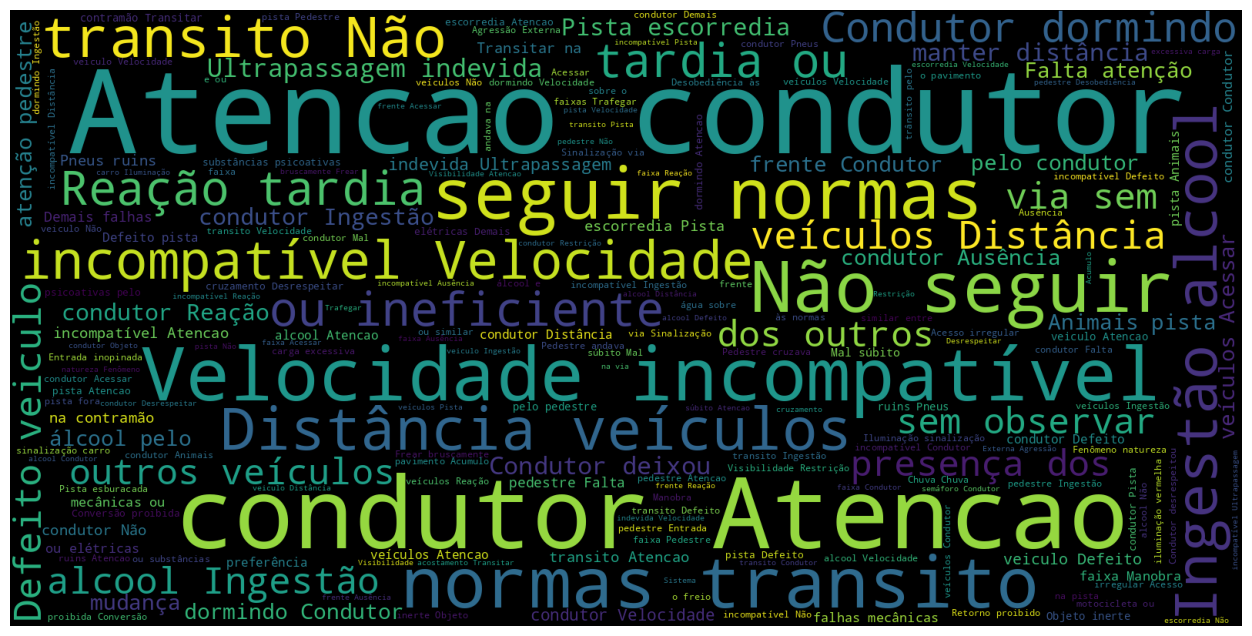

In [ ]:
# juntar todas as frases em uma única string
all_causa_acidente = ' '.join(fr for fr in causa_acidente)

# dicionário de substituição
sub_dict = {'Defeito Mecânico no Veículo': 'Defeito-veiculo',
            'Velocidade Incompatível': 'Velocidade-incompatível',
            'Condutor Dormindo': 'Condutor-dormindo',
            'Falta de Atenção à Condução': 'Atencao-condutor',
            'Defeito na Via': 'Defeito-pista',
            'Ingestão de Álcool': 'Ingestão-alcool',
            'Não guardar distância de segurança': 'Distância-veículos',
            'Pista Escorregadia': 'Pista-escorredia',
            'Falta de Atenção do Pedestre' : 'Falta-atenção-pedestre',
            'Desobediência às normas de trânsito pelo condutor' : 'Não-seguir-normas-transito',
            'Fenômenos da Natureza' : 'Fenômeno-natureza',
            'Animais na Pista': 'Animais-pista',
            'Ultrapassagem Indevida': 'Ultrapassagem-indevida',
            'Mal Súbito': 'Mal-súbito',
            'Carga excessiva e/ou mal acondicionada': 'carga-excessiva',
            'Objeto estático sobre o leito carroçável': 'Objeto-inerte',
            'Avarias e/ou desgaste excessivo no pneu': 'Pneus-ruins',
            'Sinalização da via insuficiente ou inadequada': 'Sinalização-via',
            'Deficiência ou não Acionamento do Sistema de Iluminação/Sinalização do Veículo': 'Iluminação-sinalização',
            'Ingestão de álcool pelo condutor': 'Álcool',
            'Ingestão de Substâncias Psicoativas': 'Drogas',
            'Acumulo de areia ou detritos sobre o pavimento' : 'Areia-na-Pista',
            'Sistema de drenagem ineficiente' : 'Água-na-Pista',
            'Restrição de Visibilidade' : 'Visibilidade',
            'Agressão Externa' :'Violência',
            'Ingestão de álcool e/ou substâncias psicoativas pelo pedestre' : 'Álcool-Drogas-Pedestre',
            'Desobediência às normas de trânsito pelo pedestre' : 'Desobediência-Pedestre',
            'Curva acentuada' : 'Curva-Acentuada',
            'Obras na pista' : 'Obras-na-Pista',
            'Ingestão de álcool ou de substâncias psicoativas pelo pedestre' : 'Álcool-Drogas-Pedestre',
            'Obstrução na via' : 'Obstrução-na-Via',
            'Acumulo de óleo sobre o pavimento' : 'Óleo-na-Pista',
            'Chuva',
            'Condutor desrespeitou a iluminação vermelha do semáforo' : 'Avançou-Semáforo-Vermelho',
            'Transitar na contramão' : 'Contramão'







 'Reação tardia ou ineficiente do condutor' 
 
 
 
  
 
 'Desrespeitar a preferência no cruzamento' 'Pedestre andava na pista'
 'Demais falhas mecânicas ou elétricas' 
 'Pista em desnível'
 
 'Ausência de reação do condutor'  'Pista esburacada'
  'Manobra de mudança de faixa'
 
 
 'Condutor usando celular' 'Acostamento em desnível' 'Conversão proibida'
 'Acessar a via sem observar a presença dos outros veículos'
 'Deficiência do Sistema de Iluminação/Sinalização' 'Falta de acostamento'
 'Mal súbito do condutor' 'Acumulo de água sobre o pavimento'
 'Condutor deixou de manter distância do veículo da frente'
 'Entrada inopinada do pedestre' 'Ausência de sinalização'
 'Transitar no acostamento'
 'Trafegar com motocicleta (ou similar) entre as faixas'
 'Demais falhas na via' 'Pedestre cruzava a pista fora da faixa'
 'Frear bruscamente' 'Afundamento ou ondulação no pavimento' 'Fumaça'
 'Estacionar ou parar em local proibido' 'Iluminação deficiente'
 'Acesso irregular' 'Demais Fenômenos da natureza' 'Problema com o freio'
 'Falta de elemento de contenção que evite a saída do leito carroçável'
 'Retorno proibido' 'Obstrução na via'
 'Ingestão de substâncias psicoativas pelo condutor' 'Desvio temporário'
 'Área urbana sem a presença de local apropriado para a travessia de pedestres'
 'Sinalização mal posicionada' 'Semáforo com defeito' 'Declive acentuado'
 'Faixas de trânsito com largura insuficiente'
 'Restrição de visibilidade em curvas verticais' 'Neblina'
 'Restrição de visibilidade em curvas horizontais' 'Problema na suspensão'
 'Participar de racha' 'Modificação proibida' 'Transitar na calçada'
 'Faróis desregulados' 
 'Redutor de velocidade em desacordo'
 'Deixar de acionar o farol da motocicleta (ou similar)'
 'Sinalização encoberta'           
}

# substituir as palavras de acordo com o dicionário
for key, value in sub_dict.items():
    all_causa_acidente = all_causa_acidente.replace(key, value)

# lista de stopwords
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "br"])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_causa_acidente)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_description_wordcloud.png")


## Conclusão

Com base nos dados analisados sobre acidentes de trânsito no Brasil, podemos concluir que as rodovias federais (BRs) apresentam um alto índice de ocorrência de acidentes e, consequentemente, de mortes. 

É importante destacar que a maioria dos acidentes ocorre em trechos de pista simples e em condições climáticas adversas, o que pode ser um alerta para a necessidade de melhorias na infraestrutura dessas estradas e na fiscalização do trânsito. Além disso, é fundamental que os motoristas adotem comportamentos seguros ao volante, como respeitar os limites de velocidade, não consumir bebidas alcoólicas antes de dirigir e utilizar o cinto de segurança. 

A conscientização da população sobre os riscos do trânsito e a adoção de medidas efetivas de prevenção são essenciais para a redução do número de acidentes e mortes nas estradas brasileiras